<a href="https://colab.research.google.com/github/GigasTaufan/Mall-Customer-Segmentation/blob/master/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering**

Diberikan dataset yang berisikan data kartu membership dari konsumen sebuah mall. Dataset terdiri atas 200 buah data, dan 5 atribut. Berikut adalah atribut-atribut yang terdapat pada dataset:

- **CustomerID**: Nomor ID yang diberikan kepada konsumen
- **Gender**: Jenis kelamin dari konsumen
- **Age**: Usia konsumen
- **Anual Income (k$)**: Pendapatan konsumen pertahun
- **Spending Score (1-100)**: Skor yang ditetapkan oleh mall berdasarkan perilaku pelanggan dan sifat pembelanjaan.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid')

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/GigasTaufan/Mall-Customer-Segmentation/master/data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Terdapat 2 tipe data yakni data bertipe objek dan numerik
- Bertipe numerik: CustomerID, Age, Annual Income (k$), Spending Score (1-100)
- Bertipe objek: Gender

In [ ]:
# mengecek apakah ada null value pada dataset
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Atribut CustomerID hanya sebagai penunjuk dari konsumen dan dapat didrop dari dataset

In [ ]:
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Eksplorasi 1

Dataset akan dilihat tanpa memasukkan atribut Gender.

In [ ]:
# deskripsi data tipe numerik
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Dari deskripsi data di atas terdapat informasi singkat mengenai dataset yang digunakan, terutama untuk atribut bertipe numerik:

**Age**
- Usia termuda konsumen adalah 18 tahun, dan tertua adalah 70 tahun.
- Rata-rata usia konsumen adalah 38.8 tahun.

**Annual Income**
- Pendapatan pertahun terendah konsumen adalah 15.000 pertahun. dan tertinggi adalah 137.000 pertahun.
- Rata-rata pendapatan pertahun konsumen adalah 60.000 pertahun

**Spending Score**
- Score terendah konsumen adalah 1, dan tertinggi adalah 99.
- Rata-rata score yang didapatkan adalah 50.2.

### Eksplorasi 2

Dataset akan dilihat keseluruhan dengan memasukkan atribut Gender.

Female    112
Male       88
Name: Gender, dtype: int64




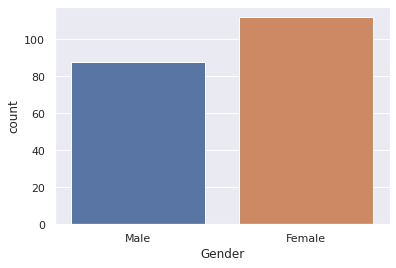

In [ ]:
# melihat atribut Gender dan perbandingan jumlah valuenya
print(df['Gender'].value_counts())
print('\n')
sns.countplot(x='Gender', data=df)

Kebanyakan konsumen yang memiliki kartu membership adalah perempuan. Selisih dari jumlah Male dan Female adalah 24. 

#### Age - Gender

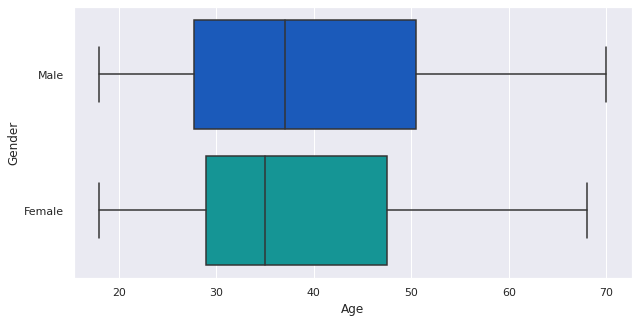

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Age',y='Gender',data=df,palette='winter', orient='h')

In [ ]:
age_df = pd.DataFrame()
age_df['Male'] = (df[df['Gender'] == 'Male'][['Gender','Age']].describe())['Age']
age_df['Female'] = (df[df['Gender'] == 'Female'][['Gender','Age']].describe())['Age']
age_df.transpose()

,count,mean,std,min,25%,50%,75%,max
Male,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0
Female,112.0,38.098214,12.644095,18.0,29.00,35.0,47.5,68.0


Dari data atribut Age yang ditampilkan dapat dilihat beberapa informasi sebagai berikut:

- Usia termuda untuk konsumen laki-laku dan perempuan sama-sama 18 tahun
- Usia tertua konsumen laki-laki adalah 70 tahun sedangkan usia tertua konsumen perempuan adalah 68 tahun
- Rata-rata usia konsumen laki-laki adalah 40 tahun sedangkan untuk rata-rata usia konsumen perempuan adalah 38 tahun

#### Annual Income (k$) - Gender

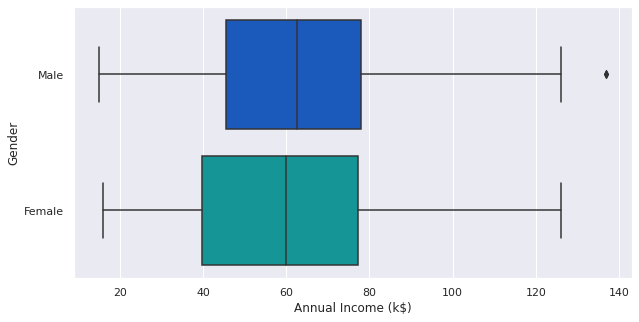

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Annual Income (k$)',y='Gender',data=df,palette='winter', orient='h')

In [ ]:
annualIncome_df = pd.DataFrame()
annualIncome_df['Male'] = (df[df['Gender'] == 'Male'][['Gender','Annual Income (k$)']].describe())['Annual Income (k$)']
annualIncome_df['Female'] = (df[df['Gender'] == 'Female'][['Gender','Annual Income (k$)']].describe())['Annual Income (k$)']
annualIncome_df.transpose()

,count,mean,std,min,25%,50%,75%,max
Male,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0
Female,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0


Dari data atribut Annual Income yang ditampilkan dapat dilihat beberapa informasi sebagai berikut:

- Pendapatan pertahun terendah untuk konsumen laki-laki adalah 15.000 dan perempuan adalah 16.000 pertahun
- Pendapatan pertahun tertinggi untuk konsumen laki-laki adalah 137.000 pertahun sedangkan untuk konsumen perempuan adalah 126.00 tahun
- Rata-rata pendapatan pertahun untuk konsumen laki-laki adalah 62.227 sedangkan untuk konsumen perempuan adalah 69.250 pertahun

#### Spending Score (1-100) - Gender

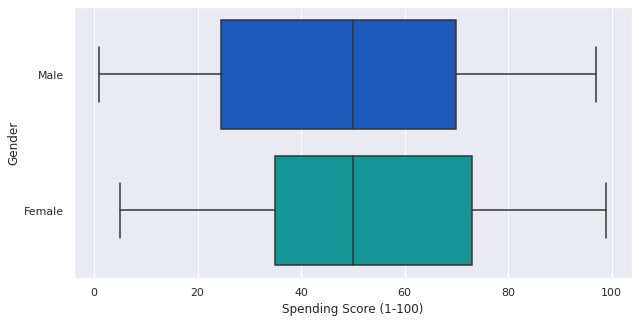

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Spending Score (1-100)',y='Gender',data=df,palette='winter', orient='h')

In [ ]:
spendingScore_df = pd.DataFrame()
spendingScore_df['Male'] = (df[df['Gender'] == 'Male'][['Gender','Spending Score (1-100)']].describe())['Spending Score (1-100)']
spendingScore_df['Female'] = (df[df['Gender'] == 'Female'][['Gender','Spending Score (1-100)']].describe())['Spending Score (1-100)']
spendingScore_df.transpose()

,count,mean,std,min,25%,50%,75%,max
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0


Dari data atribut Spending Score yang ditampilkan dapat dilihat beberapa informasi sebagai berikut:

- Score terendah untuk konsumen laki-laki adalah 1 sedangkan untuk konsumen perempuan adalah 5
- Score tertinggi untuk konsumen laki-laki adalah 97 sedangkan untuk konsumen perempuan adalah 99
- Rata-rata score untuk konsumen laki-laki adalah 48.5 sedangkan untuk konsumen perempuan adalah 51.52

### Eksplorasi 3

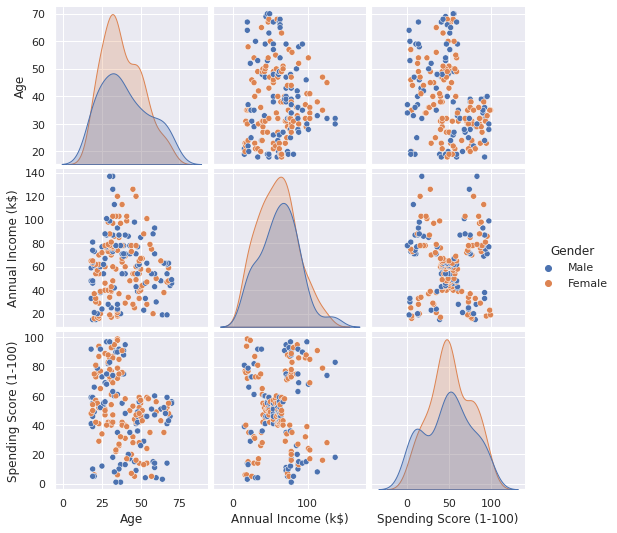

In [ ]:
sns.pairplot(df, hue='Gender')

Dilihat dari persebaran datanya, atribut Annual Income dan Spending Score memiliki kecenderungan untuk membentuk cluster-cluster berdasarkan data di dalamnya.

#### Distribusi Age - Gender - Annual Income (k$)

In [ ]:
age_range = range(15,75,5)
medians_by_age_gender = df.groupby(["Gender",pd.cut(df['Age'], age_range)]).median()
medians_by_age_gender.index = medians_by_age_gender.index.set_names(['Gender', 'Age_group'])
medians_by_age_gender.reset_index(inplace=True)

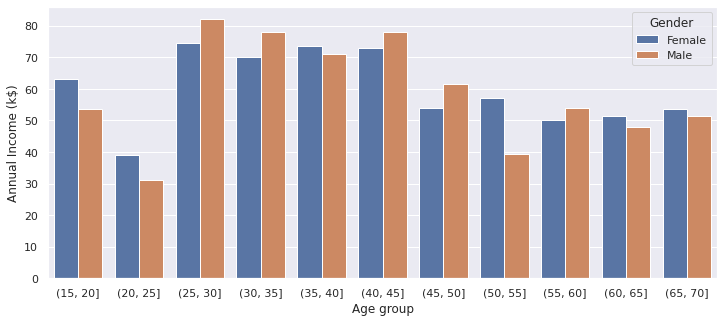

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_gender)
ax.set_xlabel('Age group')
plt.show()

Dari grafik di atas dapat dilihat beberapa informasi sebagai berikut:

- Konsumen laki-laki dan perempuan yang berada pada rentang usia 25-45 tahun memiliki pendapatan yang lebih tinggi daripada rentang usia lainnya.
- Dari 11 rentang yang ditampilkan terdapat 6 rentang yang menunjukkan bahwa perempuan memiliki pendapatan yang lebih daripada laki-laki.


#### Distribusi Age - Gender - Spending Score (1-100)

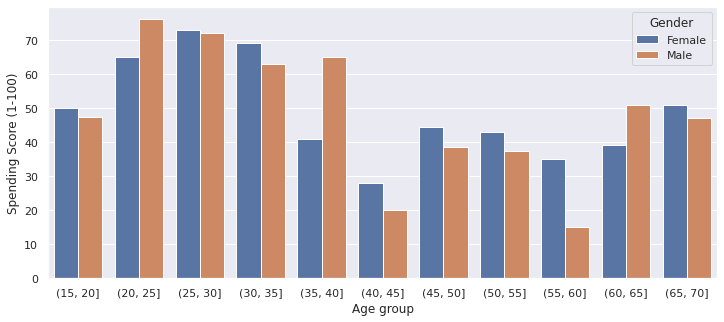

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Spending Score (1-100)', hue='Gender', data=medians_by_age_gender)
ax.set_xlabel('Age group')
plt.show()

Dari grafik di atas dapat dilihat beberapa informasi sebagai berikut:

- Konsumen laki-laki dan perempuan yang berada pada rentang usia 20-35 tahun memiliki spending score yang lebih tinggi daripada rentang usia lainnya.
- Konsumen perempuan yang berada pada rentang usia 35-40 tahun memiliki spending score yang lebih tinggi dibandingkan dengan konsumen laki-laki.
- Konsumen perempua yang berada pada rentang usia 40-55 tahun memiliki spending score lebih tinggi dibanding dengan konsumen yang berjenis kelamin perempuan.

#### Distribusi Annual Income (k$) - Spending Score (1-100)

In [ ]:
income_range = range(15,140,15)
medians_by_income_gender = df.groupby(["Gender",pd.cut(df['Annual Income (k$)'], income_range)]).median()
medians_by_income_gender.index = medians_by_income_gender.index.set_names(['Gender', 'Income_group'])
medians_by_income_gender.reset_index(inplace=True)

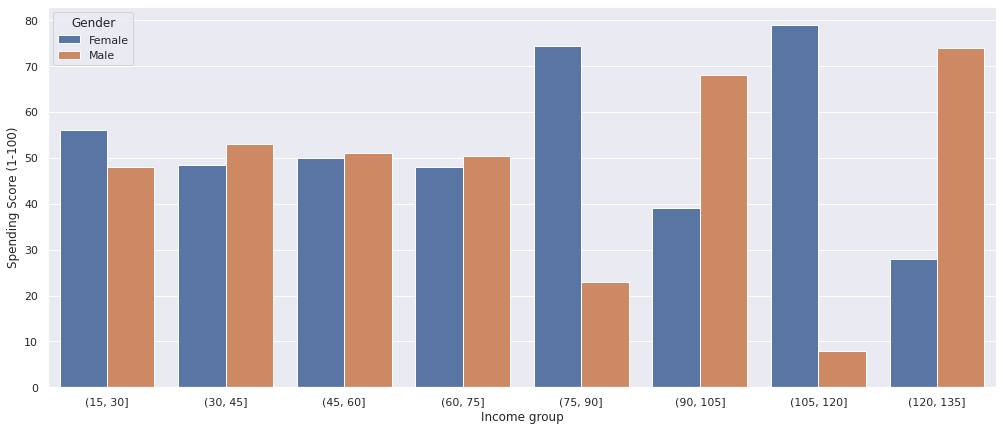

In [ ]:
fig, ax = plt.subplots(figsize=(17,7))
sns.barplot(x='Income_group', y='Spending Score (1-100)', hue='Gender', data=medians_by_income_gender)
ax.set_xlabel('Income group')
plt.show()

Dari grafik di atas dapat dilihat beberapa informasi sebagai berikut:

- Konsumen perempuan memiliki spending score yang jauh lebih tinggi daripada konsumen laki-laki pada rentang pendapatan 75-90 dan 105-120.

- Konsumen laki-laki yang memiliki pendapatan pada rentang 90-105 dan 120-135 memiliki spending score yang lebih tinggi daripada konsumen perempuan

- Pada rentang pendapatan 30-75 konsumen laki-laki memiliki spending score yang lebih tinggi daripada konsumen perempuan.


####  Distribusi Spending Score (1-100) - Annual Income (k$)

In [ ]:
score_range = range(1,101,9)
medians_by_score_gender = df.groupby(["Gender",pd.cut(df['Spending Score (1-100)'], score_range)]).median()
medians_by_score_gender.index = medians_by_score_gender.index.set_names(['Gender', 'Score_group'])
medians_by_score_gender.reset_index(inplace=True)

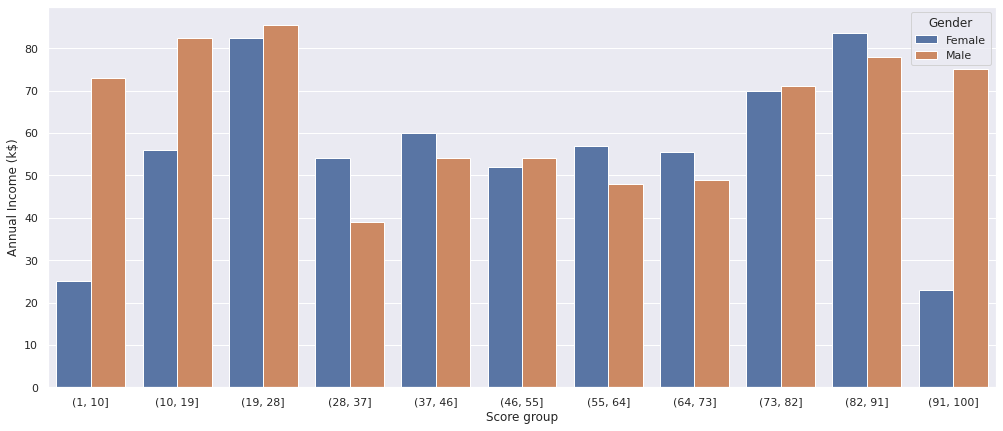

In [ ]:
fig, ax = plt.subplots(figsize=(17,7))
sns.barplot(x='Score_group', y='Annual Income (k$)', hue='Gender', data=medians_by_score_gender)
ax.set_xlabel('Score group')
plt.show()

Dari grafik di atas dapat dilihat beberapa informasi sebagai berikut:

- Konsumen perempuan cenderung memiliki spending score yang lebih tinggi daripada konsumen laki-laki.

#### Korelasi Age - Gender - Annual Income (k$)

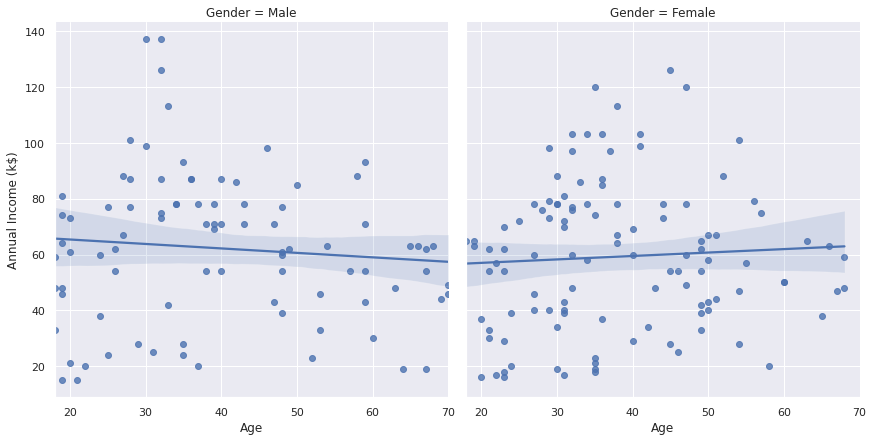

In [ ]:
sns.lmplot(x='Age', y='Annual Income (k$)', col='Gender', data=df, palette='coolwarm',height=6, aspect=1)

Dari scatter di atas dapat dilihat hubungan antara atribut annual income dengan Age dan Gender.

- Untuk konsumen yang berjenis kelamin laki-laki dapat dilihat bahwa semakin tua maka pendapatannya menurun. 

- Untuk konsumen yang berjenis kelamin perempuan dapat dilihat bahwa semakin tua maka pendapatannya meningkat

#### Korelasi Age - Gender - Spending Score (1-100)

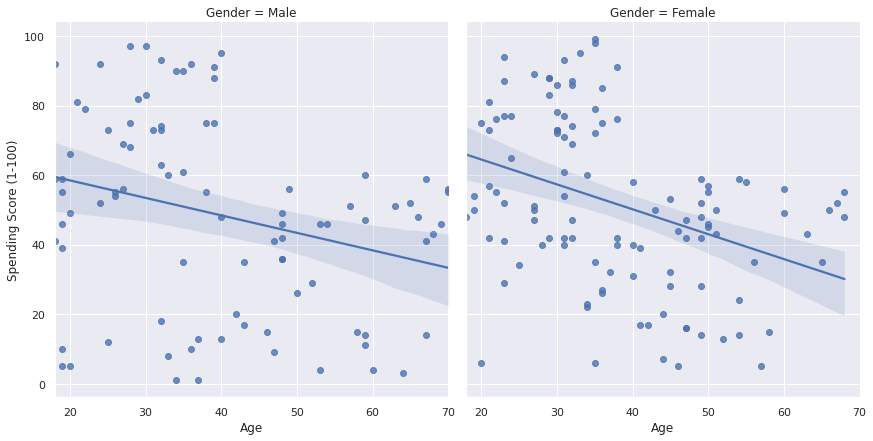

In [ ]:
sns.lmplot(x='Age', y='Spending Score (1-100)', col='Gender', data=df, palette='coolwarm',height=6, aspect=1)

Dari scatter di atas dapat dilihat hubungan antara atribut spending score dengan Age dan Gender.

- Untuk konsumen yang berjenis kelamin laki-laki dapat dilihat bahwa semakin tua maka spending score semakin menurun

- Untuk konsumen yang berjenis kelamin perempuan dapat dilihat bahwa semakin tua maka spending score semakin menurun

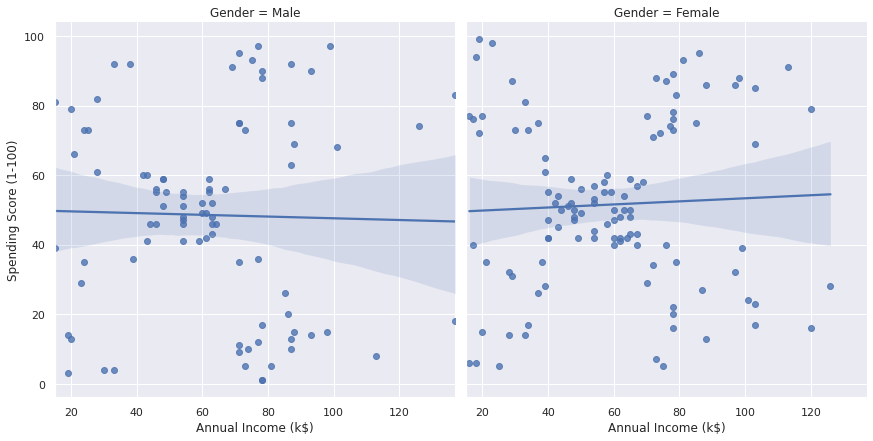

In [ ]:
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', col='Gender', data=df, palette='coolwarm',height=6, aspect=1)

Dari scatter di atas dapat dilihat hubungan antara atribut spending score dengan Age dan Gender.

- Untuk konsumen yang berjenis kelamin laki-laki dapat dilihat bahwa semakin tinggi pendapatan maka spending score akan menurun, walau tidak banyak.

- Untuk konsumen yang berjenis kelamin perempuan dapat dilihat bahwa semakin tinggi pendapatan maka spending score semakin naik.

## Data Preparation

Berdasarkan eksplorasi yang telah dilakukan dapat dilihat jika atribut yang memiliki kecenderungan untuk membentuk kluster berdasarkan datanya adalah atribut Annual Income (k$) dan atribut Spending Score (1-100), sehingga atribut lain dapat di drop

In [ ]:
df_prepared = df.copy()

In [ ]:
df_prepared.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df_prepared.drop(['Gender', 'Age'], axis=1, inplace=True)
df_prepared.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Standardize The Data

Standarisasi data dilakukan untuk menyamakan rentang dan / atau variabilitas data. Standarisasi fitur menjadikan nilai dari setiap fitur dalam data memiliki mean nol (saat mengurangkan mean di pembilang) dan unit-variance. Hal ini dilakukan untuk memastikan data yang ada bersifat konsisten, agar setiap memiliki kandungan yang sama dan format yang sama.

#### StandardScaler

In [ ]:
df_std = df_prepared.copy()
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_std.columns.tolist()
df_std[column_names] = scaler.fit_transform(df_std[column_names])
df_std.sort_index(inplace=True)
df_std.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


Text(0.5, 1.0, 'Customer Segments')

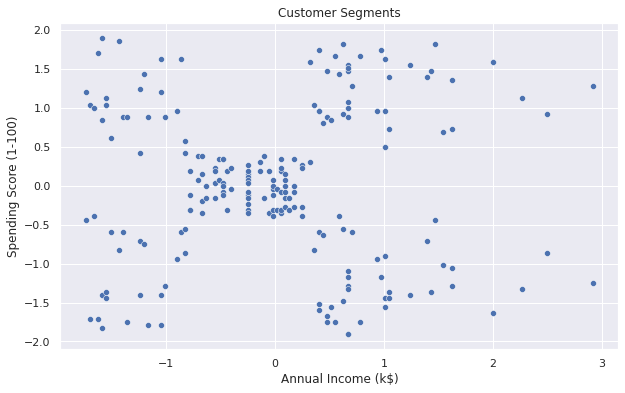

In [ ]:
# Visualizing the Data
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_std)
plt.title('Customer Segments')

Dari visualisasi di atas dapat diasumsikan bahwa atribut annual income dan spending score akan dapat menentukan cluster dari konsumen mall

## Machine Learning

### KMeans (Partitional Clustering)

KMeans adalah sebuah algoritma yang termasuk dalam unsupervised learning yang akan mencoba untuk mengelompokan data ke dalam cluster-cluster berdasarkan kemiripan data.

Tujuannya adalah untuk memisah data ke dalam kelompok-kelompok terpisah. Kemiripan adalah kunci pada KMeans. Kemiripan yang tinggi harus dimiliki oleh data yang ada dalam satu kelompok yang sama, sedangkan kemiripan antar kelompok harus lebih rendah.

Kemiripan data diukur dengan menggunakan jarak antar data yang biasanya menggunakan Euclidean Distance atau Manhattan Distance.

In [ ]:
from sklearn.cluster import KMeans

Untuk dapat mengetahui berapa jumlah kluster yang dapat mengelompokkan data dengan baik digunakan beberapa metode seperti Elbow Method dan Silhoutte Method

#### Elbow Method

In [ ]:
km1 = df_std.to_numpy()
error_rate = []
for i in range(1,15):
    
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(km1)
    error_rate.append(kmeans.inertia_)

Text(0, 0.5, 'Error Rate')

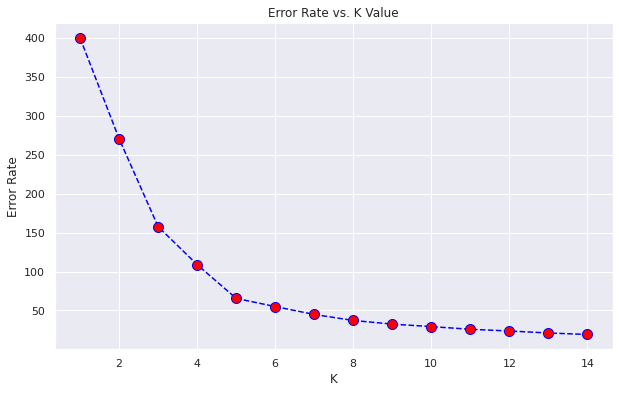

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Dari bentuk grafik di atas elbow atau siku mulai terbentuk pada nilai K = 5

#### Silhoutte Method

In [ ]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
# from sklearn.cluster import KMeans
sil_score = []

for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster).fit(km1)
    label = kmeans.labels_
    sil_coeff = silhouette_score(km1, label, metric='euclidean')
    sil_score.append(sil_coeff)
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.3093014040985521
For n_clusters=3, The Silhouette Coefficient is 0.46658474419000145
For n_clusters=4, The Silhouette Coefficient is 0.4939069237513199
For n_clusters=5, The Silhouette Coefficient is 0.5546571631111091
For n_clusters=6, The Silhouette Coefficient is 0.5378290321306309
For n_clusters=7, The Silhouette Coefficient is 0.5281492781108291
For n_clusters=8, The Silhouette Coefficient is 0.4541279523637649
For n_clusters=9, The Silhouette Coefficient is 0.455477460588866
For n_clusters=10, The Silhouette Coefficient is 0.4507937437744966
For n_clusters=11, The Silhouette Coefficient is 0.4369571926488904
For n_clusters=12, The Silhouette Coefficient is 0.4306856834760435
For n_clusters=13, The Silhouette Coefficient is 0.41712729944988225
For n_clusters=14, The Silhouette Coefficient is 0.42140267599236375


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


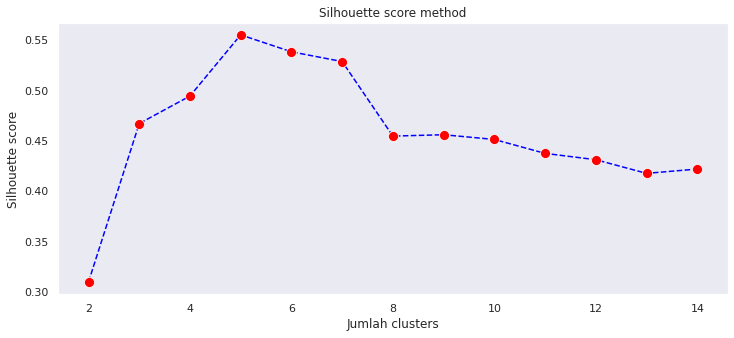

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(range(2, 15), sil_score, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
ax.set_title("Silhouette score method")
ax.set_xlabel("Jumlah clusters")
ax.set_ylabel("Silhouette score")
plt.grid()
plt.show()

Dari bentuk grafik di atas Silhouette score terbaik pada nilai K = 5

#### Modelling KMeans

Berdasarkan Elbow Method dan Silhoutte Method yang telah dilakukan nilai K terbaik sama-sama menunjukkan 5. Selanjutnya akan dilakukan pemodelan dengan nilai K=5

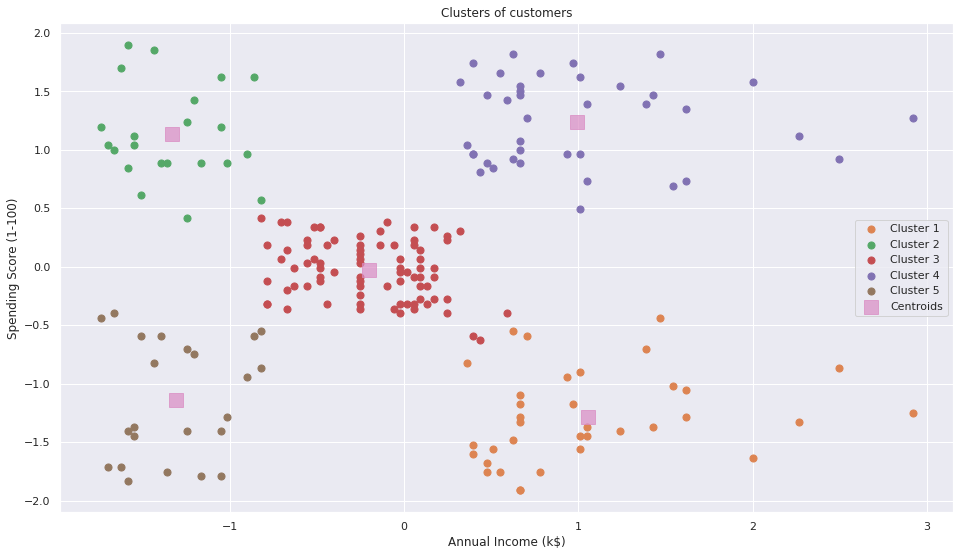

In [ ]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(km1)

# Visualising Clusters for k=5
plt.figure(figsize=(16, 9))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_std)
plt.scatter(km1[cluster == 0, 0], km1[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(km1[cluster == 1, 0], km1[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(km1[cluster == 2, 0], km1[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(km1[cluster == 3, 0], km1[cluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(km1[cluster == 4, 0], km1[cluster == 4, 1], s = 50, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

Model yang dibuat oleh KMeans dengan K=5 telah dapat memisahkan data ke dalam kelompok-kelompok sendiri.

### Agglomerative (Hierarchical Clustering)

Hierarchical Clustering disebut juga analisis klaster secara hierarki atau HCA adalah metode analisis claster yang mencoba membangun hierarki claster. Endpointnya adalah sekumpulan cluster, di mana setiap cluster berbeda satu sama lain, dan objek dalam setiap cluster secara luas mirip satu sama lain.

Agglomerative Clustering adalah strategi pengelompokan hirarki yang dimulai dengan setiap objek dalam satu cluster yang terpisah kemudian membentuk cluster yang semakin membesar. Jadi, banyaknya cluster awal adalah sama dengan banyaknya objek.

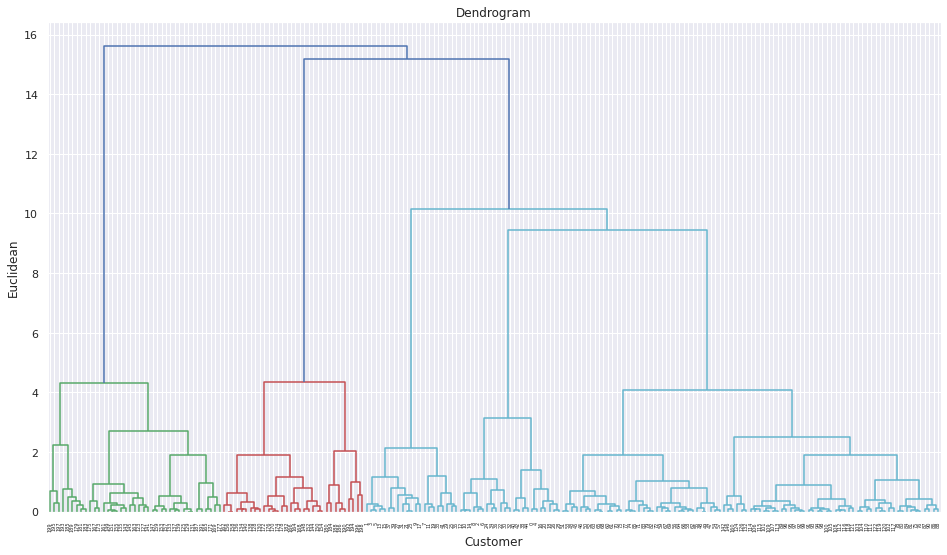

In [ ]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(16, 9))
dend = sch.dendrogram(sch.linkage(km1, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

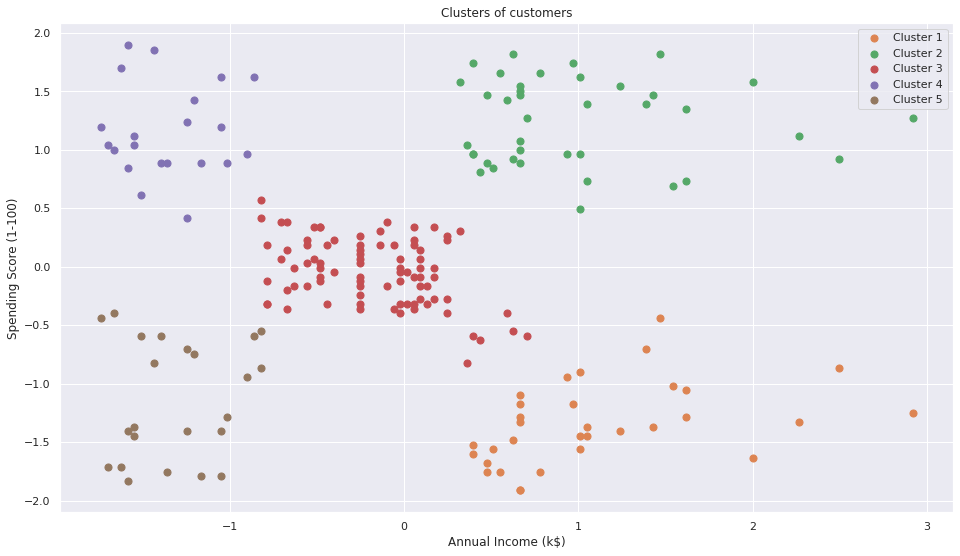

In [ ]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(km1)

# Visualising Clusters for k=5
plt.figure(figsize=(16, 9))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_std)
plt.scatter(km1[hcluster == 0, 0], km1[hcluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(km1[hcluster == 1, 0], km1[hcluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(km1[hcluster == 2, 0], km1[hcluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(km1[hcluster == 3, 0], km1[hcluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(km1[hcluster == 4, 0], km1[hcluster == 4, 1], s = 50, label = 'Cluster 5')
plt.title('Clusters of customers')
plt.legend()
plt.show()

Dengan menggunakan Agglomerative Clustering di dapat pohon hierarki dari data. Dengan K=5 dapat menunjukkan pengelompokkan datanya juga dapat terlihat

## Menambahkan Hasil klasterisasi Pada Dataset

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
# Add Cluster Information to the Raw Data
df['KMeans cluster'] = cluster
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans cluster
0,Male,19,15,39,4
1,Male,21,15,81,1
2,Female,20,16,6,4
3,Female,23,16,77,1
4,Female,31,17,40,4


In [ ]:
# Save= Result
df.to_csv('mall_customers_clusters.csv', index=False)

# Conclusion


Berdasarkan hasil dari hasil Elbow Method dan Silhoutte Score di dapatkan bahwa model KMeans dan Agglomerative akan optimum jika menggunakan nilai K=5. Sehingga jumlah kluster yang akan dibuat adalah 5.

Dari 5 kluster tersebut dapat dilanjutkan eksplorasi tentang seperti apa konsumen yang berada pada setiap kluster

## Exploratory Data Analysis Kluster

Ekplorasi kali ini akan melihat seperti apa konsumen yang berhasil di kelompokkan

2    81
3    39
0    35
4    23
1    22
Name: KMeans cluster, dtype: int64




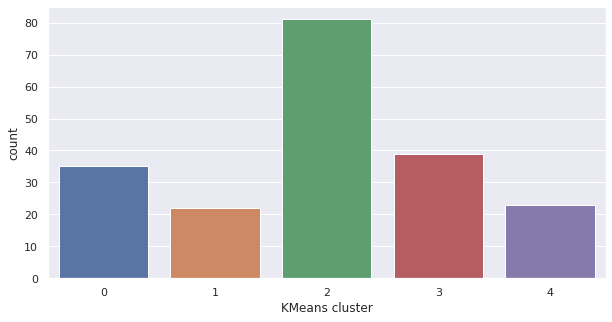

In [ ]:
print(df['KMeans cluster'].value_counts())
print('\n')
plt.figure(figsize=(10, 5))
sns.countplot(x='KMeans cluster', data=df)

### Gender - Kluster

Kebanyakan konsumen berada pada cluster 2.

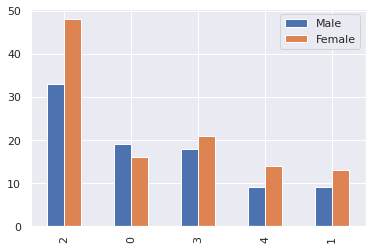

In [ ]:
gender_df = pd.DataFrame()
gender_df['Male'] = df[df['Gender'] == 'Male']['KMeans cluster'].value_counts()
gender_df['Female'] = df[df['Gender'] == 'Female']['KMeans cluster'].value_counts()
gender_df.plot.bar()

Pada cluster 2 kebanyakan berisi konsumen perempuan.

### Age - Kluster

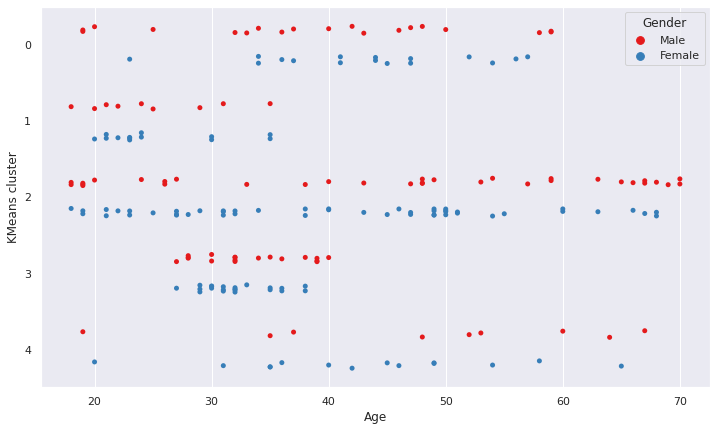

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.stripplot(x="Age", y="KMeans cluster", data=df,jitter=True,hue='Gender',palette='Set1',dodge=True, orient='h')

Dari grafik di atas didapatkan beberapa informasi sebagai berikut:

- Kluster 1 diisi oleh konsumen yang berusia kurang dari 40 tahun.
- Kluster 2 diisi oleh konsumen dari berbagai usia dari yang kurang dari 20 tahun sampai konsumen yang hampir berusia 70 tahun.
- Kluster 3 diisi oleh konsumen yang berusia lebih dari 20 tahun dan kurang dari 50 tahun
- Kluster 0 dan kluster 4 diisi oleh konsumen yang memiliki rentang yang sama. 

### Annual Income (k$) - Kluster

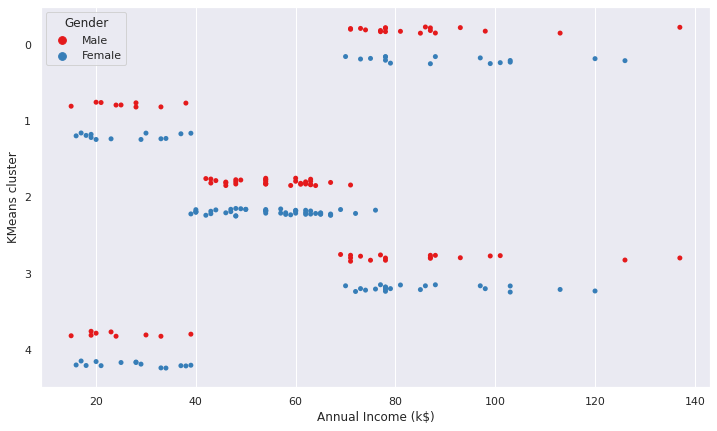

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.stripplot(x="Annual Income (k$)", y="KMeans cluster", data=df,jitter=True,hue='Gender',palette='Set1',dodge=True, orient='h')

Dari grafik di atas didapatkan beberapa informasi sebagai berikut:

- Konsumen yang masuk pada kluster 1 dan kluster 4 sama-sama memiliki pendapatan kurang dari 40000
- Konsumen yang masuk pada kluster 2 adalah orang-orang yang memiliki pendapatan kurang dari 80000 dan lebih dari 30000.
- Kluster 0 dan 3 diisi oleh konsumen yang memiliki pendapatan lebih dari 60000 ke atas.

### Spending Score (1-100) - Kluster

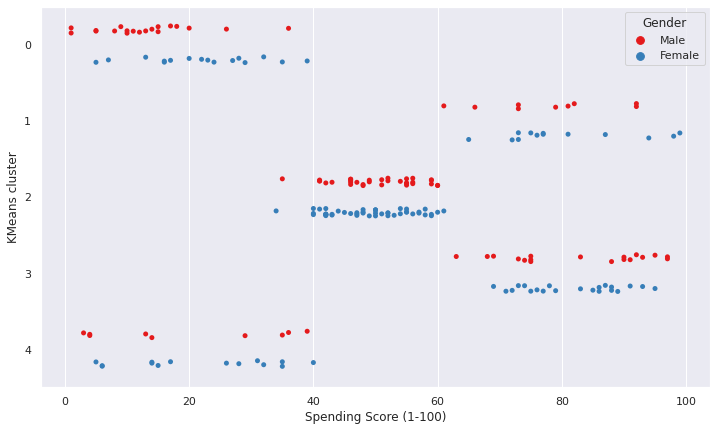

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.stripplot(x="Spending Score (1-100)", y="KMeans cluster", data=df,jitter=True,hue='Gender',palette='Set1',dodge=True, orient='h')

Dari grafik di atas didapatkan beberapa informasi sebagai berikut:

- Konsumen yang masuk pada kluster 1 dan kluster 3 sama-sama memiliki spending score lebih dari 60.
- Konsumen yang masuk pada kluster 2 adalah orang-orang yang memiliki spending score kurang dari 70 dan lebih dari 30.
- Kluster 0 dan 4 diisi oleh konsumen yang memiliki spending score kurang dari 50.